Мы имеем датасет (средняя зарплата от средней стоимости дома). Изначально классов нет поэтому сначала придется классифицировать самим

Так как в дата сете рассмотрены не столько отдельные параметры одного дома дома, сколько средние параметры домов на определенной территории (насолько я понял), то описание параметров тоже будем обозначать в среднем



1.   longitude - долгота
2.   latitude - широта
3.   housing_median_age - средний возраст домов
4.   total_rooms - общая площадь
5.   total_bedrooms - общая площадь спален
6.   population - население
7.   households - домохозяйства
8.   median_income - доход
9.   median_house_value - стоимость дома
10.  ocean_proximity - близость до океана\залива



In [165]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

from sklearn.metrics import plot_confusion_matrix

Немного посмотрим на наш массив

In [166]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [167]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [168]:
data['ocean_proximity'] = data['ocean_proximity'].astype('category')

In [169]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)

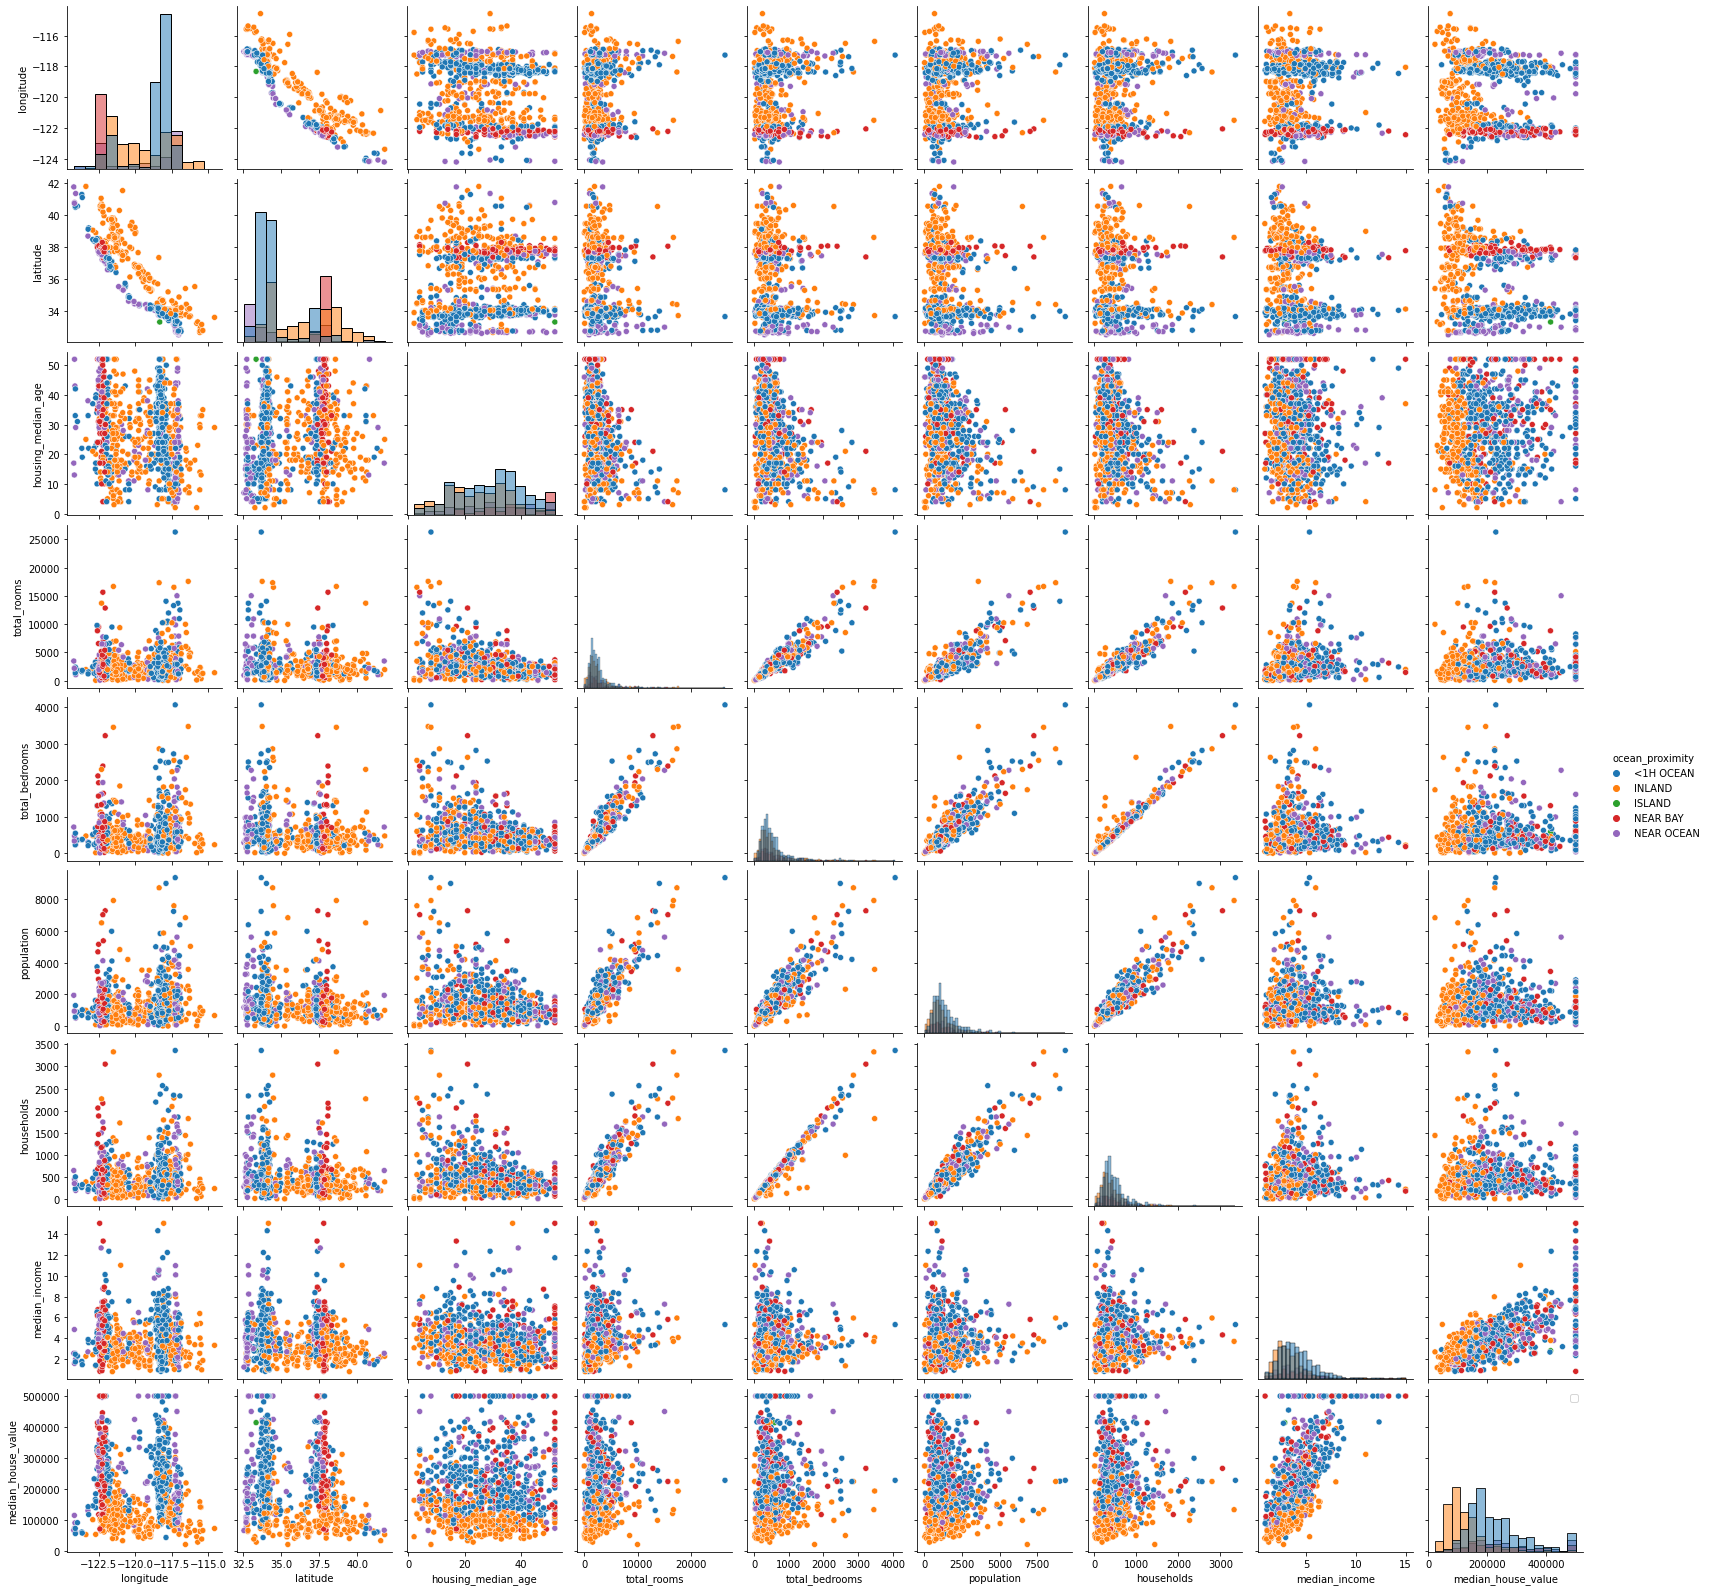

In [170]:
sns.pairplot(data.iloc[random_subset], hue = 'ocean_proximity', diag_kind='hist')
plt.legend()

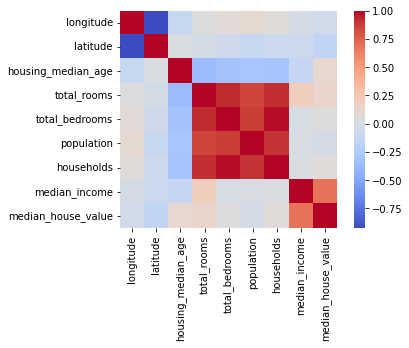

In [171]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

Видна достаточно сильная корреляция между средним доходом и средней ценой дома.

In [172]:
corr_mat>0.5

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,True,False,False,False,False,False,False,False,False
latitude,False,True,False,False,False,False,False,False,False
housing_median_age,False,False,True,False,False,False,False,False,False
total_rooms,False,False,False,True,True,True,True,False,False
total_bedrooms,False,False,False,True,True,True,True,False,False
population,False,False,False,True,True,True,True,False,False
households,False,False,False,True,True,True,True,False,False
median_income,False,False,False,False,False,False,False,True,True
median_house_value,False,False,False,False,False,False,False,True,True


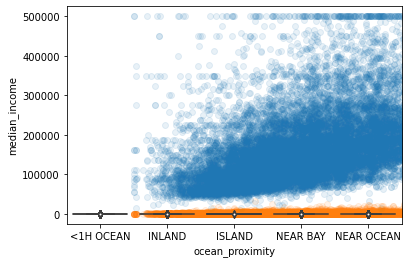

In [173]:
plt.scatter(data['median_income'], data['median_house_value'],alpha = 0.1)
plt.scatter(data['median_income'], data['total_rooms'], alpha = 0.1)
sns.violinplot(x="ocean_proximity", y="median_income", data=data)
sns.boxplot(x="ocean_proximity", y="median_income", data=data)

Видна небольшая зависимость от того, где дом продается, выделяются дома, которые расположены "вне досягаемости до воды". Цена на них ниже

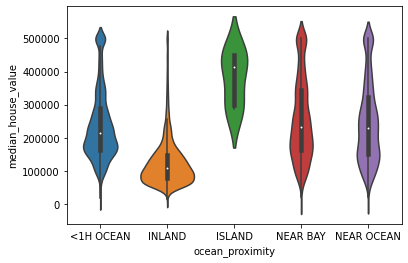

In [174]:
sns.violinplot(x="ocean_proximity", y="median_house_value", data=data)

In [175]:
data_new = data

Ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'])
data_new = pd.concat((data_new, Ocean_proximity_dummies), axis=1)

data_new = data_new.drop(['ocean_proximity'], axis=1)
data_new = data_new.drop(['longitude'], axis=1)
data_new = data_new.drop(['latitude'], axis=1)


In [176]:
tmp = data_new[data_new["INLAND"] == 1]
tmp = tmp.drop(['ISLAND'], axis=1)
tmp = tmp.drop(['NEAR BAY'], axis=1)
tmp = tmp.drop(['NEAR OCEAN'], axis=1)
tmp = tmp.drop(['<1H OCEAN'], axis=1)

In [177]:
random_subset = np.random.choice(np.arange(tmp.shape[0]), size=100, replace=False)

посмотрим о возможные корреляции

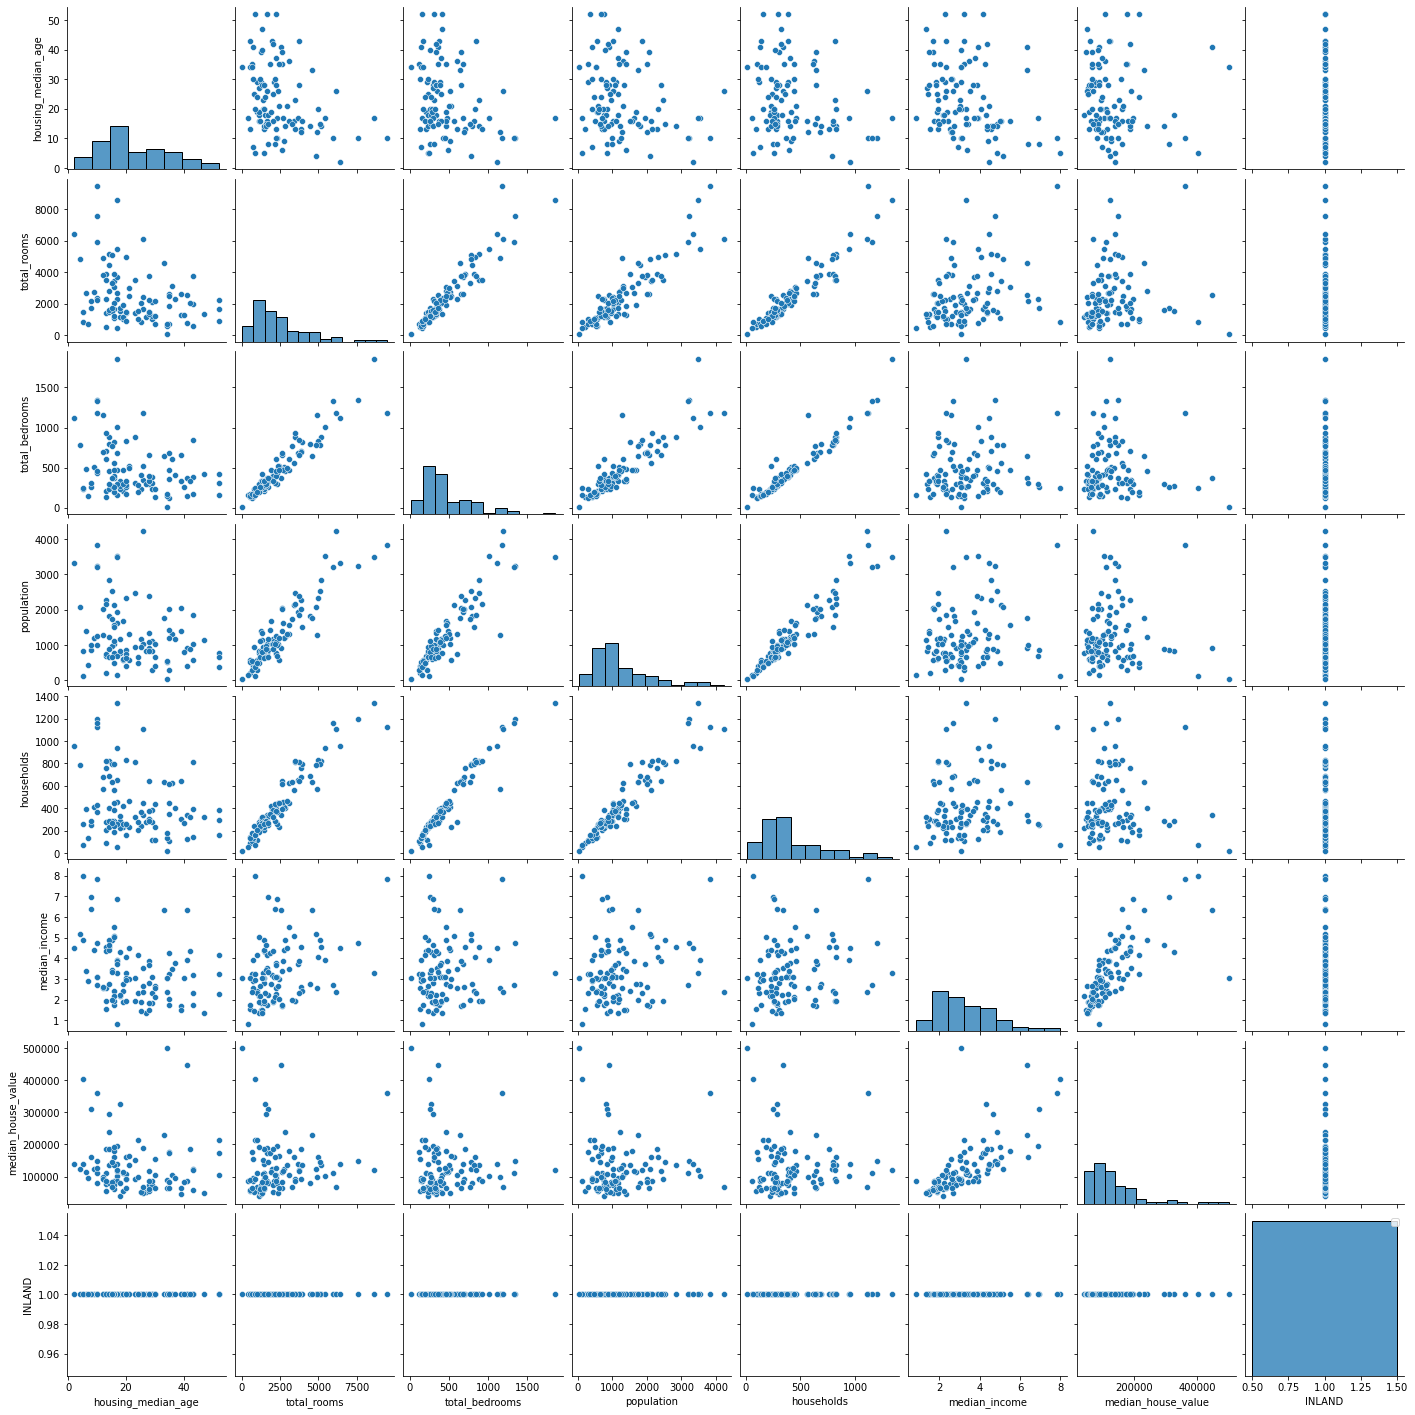

In [178]:
sns.pairplot(tmp.iloc[random_subset], diag_kind='hist')
plt.legend()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND
housing_median_age,True,False,False,False,False,False,False,False
total_rooms,False,True,True,True,True,False,False,False
total_bedrooms,False,True,True,True,True,False,False,False
population,False,True,True,True,True,False,False,False
households,False,True,True,True,True,False,False,False
median_income,False,False,False,False,False,True,True,False
median_house_value,False,False,False,False,False,True,True,False
INLAND,False,False,False,False,False,False,False,False


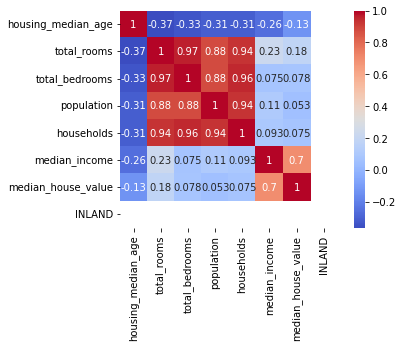

In [179]:
corr_mat = tmp.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm',annot=True)
corr_mat > 0.5

Избавляемся от пустых значений

In [180]:
data_new.isna().sum() 

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [181]:
data_new['total_bedrooms'].fillna(data_new['total_bedrooms'].mode().iloc[0], inplace=True)

In [182]:
data_new.isna().sum() 

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [183]:
data_stand = (data_new - data_new.mean(axis = 0))/data_new.std(axis = 0)

In [184]:
data_stand.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,3.855658e-17,2.444212e-17,-1.046536e-16,-1.927829e-17,6.334296e-17,7.711317e-17,-1.211778e-16,-1.652425e-16,-7.160508e-17,8.262125e-18,8.262125e-18,4.406467e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.196127e+00,-1.207254e+00,-1.271944e+00,-1.256092e+00,-1.303952e+00,-1.774256e+00,-1.662601e+00,-8.911342e-01,-6.818725e-01,-1.556583e-02,-3.532557e-01,-3.844572e-01
25%,-8.453727e-01,-5.445566e-01,-5.791750e-01,-5.637952e-01,-5.742155e-01,-6.881019e-01,-7.561450e-01,-8.911342e-01,-6.818725e-01,-1.556583e-02,-3.532557e-01,-3.844572e-01
50%,2.864502e-02,-2.332048e-01,-2.482646e-01,-2.291262e-01,-2.368104e-01,-1.767908e-01,-2.353280e-01,-8.911342e-01,-6.818725e-01,-1.556583e-02,-3.532557e-01,-3.844572e-01
75%,6.642943e-01,2.347971e-01,2.570285e-01,2.644885e-01,2.758360e-01,4.592952e-01,5.014851e-01,1.122111e+00,1.466479e+00,-1.556583e-02,-3.532557e-01,-3.844572e-01
max,1.856137e+00,1.681517e+01,1.406897e+01,3.024960e+01,1.460117e+01,5.858144e+00,2.540349e+00,1.122111e+00,1.466479e+00,6.424017e+01,2.830673e+00,2.600944e+00


In [185]:
data_stand

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.982119,-0.804800,-0.967221,-0.974405,-0.977009,2.344709,2.129580,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
1,-0.607004,2.045841,1.358675,0.861418,1.669921,2.332181,1.314124,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
2,1.856137,-0.535733,-0.822001,-0.820757,-0.843616,1.782656,1.258663,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
3,1.856137,-0.624199,-0.714872,-0.766010,-0.733764,0.932945,1.165072,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
4,1.856137,-0.462393,-0.607743,-0.759828,-0.629142,-0.012881,1.172871,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.289180,-0.444974,-0.383962,-0.512579,-0.443438,-1.216099,-1.115777,-0.891134,1.466479,-0.015566,-0.353256,-0.384457
20636,-0.845373,-0.888682,-0.917227,-0.944382,-1.008396,-0.691576,-1.124443,-0.891134,1.466479,-0.015566,-0.353256,-0.384457
20637,-0.924829,-0.174991,-0.119709,-0.369528,-0.174037,-1.142566,-0.992722,-0.891134,1.466479,-0.015566,-0.353256,-0.384457
20638,-0.845373,-0.355591,-0.300639,-0.604415,-0.393743,-1.054557,-1.058583,-0.891134,1.466479,-0.015566,-0.353256,-0.384457


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
housing_median_age,True,False,False,False,False,False,True,False,False,False,True,False
total_rooms,False,True,True,True,True,True,True,False,False,False,False,False
total_bedrooms,False,True,True,True,True,False,False,False,False,False,False,False
population,False,True,True,True,True,False,False,False,False,False,False,False
households,False,True,True,True,True,False,False,False,False,False,False,False
median_income,False,True,False,False,False,True,True,True,False,False,False,False
median_house_value,True,True,False,False,False,True,True,True,False,False,True,True
<1H OCEAN,False,False,False,False,False,True,True,True,False,False,False,False
INLAND,False,False,False,False,False,False,False,False,True,False,False,False
ISLAND,False,False,False,False,False,False,False,False,False,True,False,False


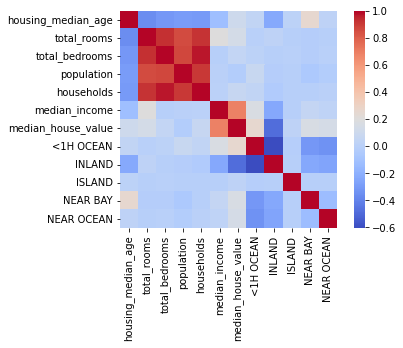

In [186]:
corr_mat = data_stand.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
corr_mat > 0.1

In [187]:
# X = data_stand.drop(['median_income', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], axis=1)
X = data_stand.drop(['median_income'], axis=1)
y = data_new['median_income']

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(15480, 5160)

Линейная регрессия

In [189]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [190]:
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

In [191]:
lr_model.coef_

array([-2.80756533e-01,  1.99976504e+00, -2.21256674e+00,  4.04245480e-02,
        1.54852518e-01,  1.16936758e+00,  4.40603781e-02,  1.40514527e-03,
       -2.97581859e-02,  7.89119608e-03, -7.33054288e-02])

In [192]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(1.2194649600109244,
 1.4449275207766266,
 0.6635192839649526,
 0.5945047783797089)

Результаты конечно не радуют, но чем богаты

In [193]:
lr_model.score(X_train, y_train) 

0.6635192839649526

Делаем из столбца median_income булевый столбец
Пусть если значение было > 0 то это класс выше среднего, остальные ниже среднего

In [194]:
for i in range(len(data_stand)):
  if data_stand['median_income'][i]>0:
    data_stand['median_income'][i] = 1
  else :
    data_stand['median_income'][i] = 0
data_stand

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.982119,-0.804800,-0.967221,-0.974405,-0.977009,1.0,2.129580,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
1,-0.607004,2.045841,1.358675,0.861418,1.669921,1.0,1.314124,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
2,1.856137,-0.535733,-0.822001,-0.820757,-0.843616,1.0,1.258663,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
3,1.856137,-0.624199,-0.714872,-0.766010,-0.733764,1.0,1.165072,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
4,1.856137,-0.462393,-0.607743,-0.759828,-0.629142,0.0,1.172871,-0.891134,-0.681873,-0.015566,2.830673,-0.384457
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.289180,-0.444974,-0.383962,-0.512579,-0.443438,0.0,-1.115777,-0.891134,1.466479,-0.015566,-0.353256,-0.384457
20636,-0.845373,-0.888682,-0.917227,-0.944382,-1.008396,0.0,-1.124443,-0.891134,1.466479,-0.015566,-0.353256,-0.384457
20637,-0.924829,-0.174991,-0.119709,-0.369528,-0.174037,0.0,-0.992722,-0.891134,1.466479,-0.015566,-0.353256,-0.384457
20638,-0.845373,-0.355591,-0.300639,-0.604415,-0.393743,0.0,-1.058583,-0.891134,1.466479,-0.015566,-0.353256,-0.384457


Классифицируем значения с помощью к ближайших


In [195]:
y = data_stand['median_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

y_train

from sklearn.neighbors import KNeighborsClassifier


In [196]:
k_neigh = KNeighborsClassifier(n_neighbors=2)
k_neigh.fit(X_train,y_train)

pred_test = k_neigh.predict(X_test)

In [197]:
err_test  = np.mean(y_test  != pred_test)
err_test

0.1996124031007752

Не хорошо. Попробуем найти оптимальный параметр для k ближайших

In [198]:
error_rates = []
for i in np.arange(1, 30):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train, y_train)
    new_predictions = new_model.predict(X_test)
    error_rates.append(np.mean(new_predictions != y_test))

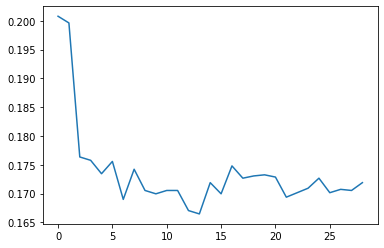

In [199]:
plt.plot(error_rates)

Теперь с этим параметром проводим аналогичные тесты

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


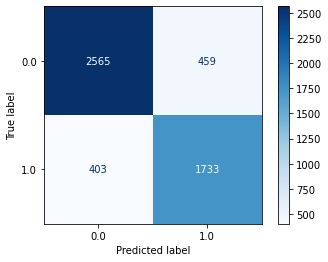

In [200]:
min(error_rates)
ind = error_rates.index(min(error_rates))

new_model = KNeighborsClassifier(n_neighbors = ind)
new_model.fit(X_train, y_train)
new_predictions = new_model.predict(X_train)
plot_confusion_matrix(new_model, X_test, y_test, cmap=plt.cm.Blues)



In [201]:
y_test_predict = new_model.predict(X_test)
err_train = 1 - new_model.score(X_train, y_train)
err_test = 1 - new_model.score(X_test, y_test)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 14.205426356589147%
Ошибка на тесте: 16.705426356589147%


Результаты стали лучше, но все же хотелось большего результата.
возможно метод k ближайших не подходит для решения данной задачи

Логистическая регрессия


In [202]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [203]:
y_test_predict = log.predict(X_test)
y_train_predict = log.predict(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


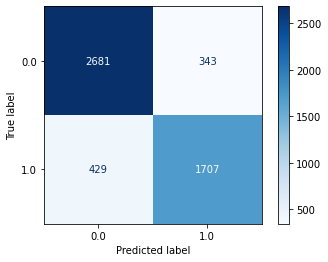

In [204]:
plot_confusion_matrix(log, X_test, y_test, cmap=plt.cm.Blues)

In [205]:
y_test_predict = log.predict(X_test)
err_train = 1 - log.score(X_train, y_train)
err_test = 1 - log.score(X_test, y_test)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 14.244186046511631%
Ошибка на тесте: 14.961240310077518%


Результат практически аналогичный k ближайшим, но все же получше


In [206]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
import seaborn as sns  
sc = StandardScaler()
X_train_std = sc.fit_transform(X)

In [207]:
scaled_data_train = X_train_std

In [208]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
# cov_mat

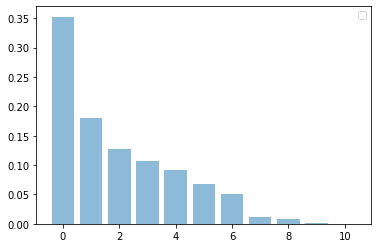

In [209]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
plt.bar(range(0,11), var_exp, alpha=0.5,
        align='center')
plt.legend(loc='best')
plt.show()

In [210]:
X = pd.DataFrame(X)
Y = pd.DataFrame(y)

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
import seaborn as sns  
sc = StandardScaler()
X_train_std = sc.fit_transform(X)

scaled_data_train = pd.DataFrame(X_train_std)


pca_train = PCA(n_components = 6)
pca_train.fit(scaled_data_train)
data_pca_X_train = pca_train.transform(scaled_data_train)
data_pca_X_train = pd.DataFrame(data_pca_X_train)
     

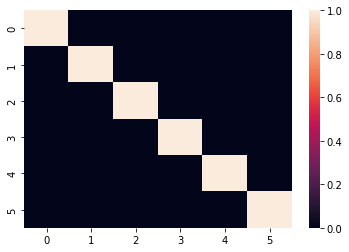

In [211]:
sns.heatmap(data_pca_X_train.corr())

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

N_train = int(len(data_pca_X_train) * 0.8)
N_test = len(data_pca_X_train) - N_train

X_train, X_test, Y_train, Y_test = train_test_split(data_pca_X_train, Y, 
                                                    train_size = N_train, test_size = N_test, 
                                                    stratify = Y, random_state = 6)

In [213]:
error_rates = []
for i in np.arange(1, 30):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train, Y_train)
    new_predictions = new_model.predict(X_test)
    error_rates.append(1 - new_model.score(X_test, Y_test))

min(error_rates)
ind = error_rates.index(min(error_rates))



/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [214]:
new_model = KNeighborsClassifier(n_neighbors = ind+1)
new_model.fit(X_train, Y_train)
new_predictions = new_model.predict(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [215]:
knn = KNeighborsClassifier(n_neighbors = ind+1)
knn.fit(X_train, Y_train)


y_test_predict = knn.predict(X_test)
err_train = 1 - knn.score(X_train, Y_train)
err_test = 1 - knn.score(X_test, Y_test)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')
     

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Ошибка на обучении: 20.61531007751938%
Ошибка на тесте: 22.650193798449614%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


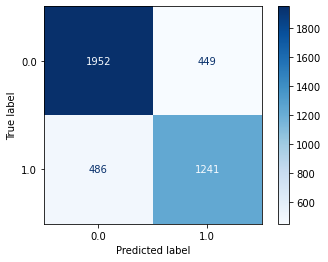

In [217]:
plot_confusion_matrix(knn, X_test, Y_test, cmap=plt.cm.Blues)

При использовании PCA ошибка стала больше


Отсюда следует сделать вывод, что для данной задачи нужны все параметры, тк при понижении размерности ошибка возрастает. 

In [218]:
y = data_stand['median_income']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

Random Forest

In [219]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [220]:
y_pred = tree_model.predict(X_test)

Дерево получилось слишком большое, поэтому не получилось его вывести

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


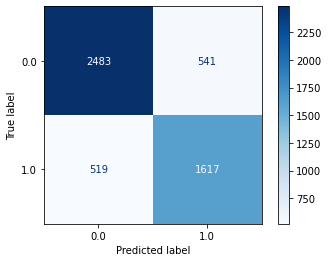

In [221]:
plot_confusion_matrix(tree_model, X_test, Y_test, cmap=plt.cm.Blues)

In [222]:
err_test = 1 - tree_model.score(X_test, Y_test)
err_train = 1 - tree_model.score(X_train, Y_train)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 0.0%
Ошибка на тесте: 20.542635658914733%


K ближайших и лин. регрессия отработали лучше, чем дерево. Разница почти в 5% точности!

Дерево решений

In [223]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=5)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=5)

In [224]:
y_pred = rfc.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


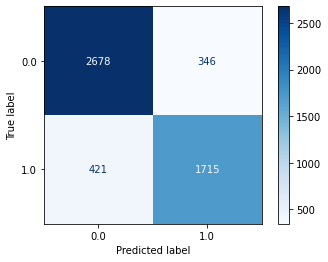

In [225]:
plot_confusion_matrix(rfc, X_test, Y_test, cmap=plt.cm.Blues)

In [226]:
err_test = 1 - rfc.score(X_test, Y_test)
err_train = 1 - rfc.score(X_train, Y_train)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 0.0%
Ошибка на тесте: 14.864341085271315%


Ошибка стала меньше. Ошибка практически такая же что и у к-ближ. и лин. регр.

Подберем оптимальный параметр

1) n_estimators


In [227]:
error_rates = []
for i in np.arange(1, 50):
    rfc = RandomForestClassifier(n_estimators =i)
    rfc.fit(X_train, Y_train)
    new_predictions = rfc.predict(X_test)
    error_rates.append(1 - rfc.score(X_test, Y_test))

min(error_rates)
ind = error_rates.index(min(error_rates))

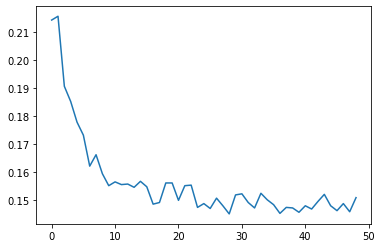

In [228]:
plt.plot(error_rates)

In [229]:
best_err1 = min(error_rates)
best_err1

0.14515503875968994

2) max_depth

In [230]:
error_rates = []
for i in np.arange(1, 50):
    rfc = RandomForestClassifier(max_depth  =i)
    rfc.fit(X_train, Y_train)
    new_predictions = rfc.predict(X_test)
    error_rates.append(1 - rfc.score(X_test, Y_test))

min(error_rates)
ind = error_rates.index(min(error_rates))

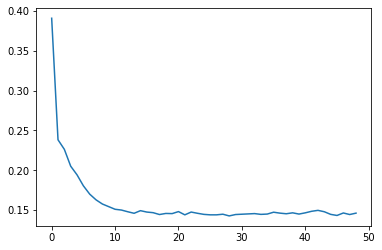

In [231]:
plt.plot(error_rates)

In [232]:
best_err2 = min(error_rates)
best_err2

0.14263565891472874

Logistic Regression

In [233]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

err_test = 1 - model.score(X_test, Y_test)
err_train = 1 - model.score(X_train, Y_train)
print('Ошибка на обучении: ' + str(err_train * 100) + '%')
print('Ошибка на тесте: ' + str(err_test * 100) + '%')

Ошибка на обучении: 14.244186046511631%
Ошибка на тесте: 14.961240310077518%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


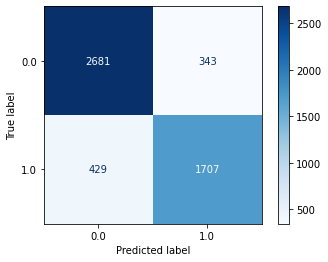

In [234]:
plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues)

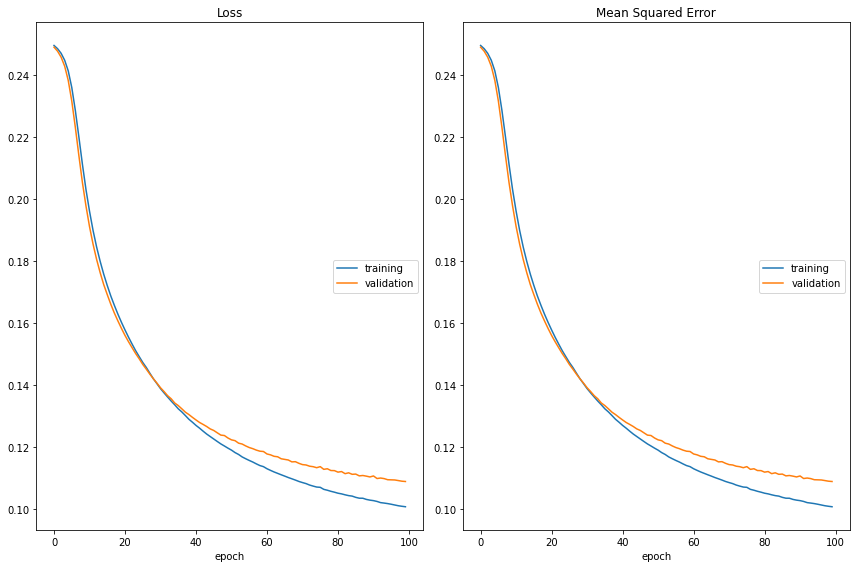

Loss
	training         	 (min:    0.101, max:    0.250, cur:    0.101)
	validation       	 (min:    0.109, max:    0.249, cur:    0.109)
Mean Squared Error
	training         	 (min:    0.101, max:    0.250, cur:    0.101)
	validation       	 (min:    0.109, max:    0.249, cur:    0.109)


In [235]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import SGD
from livelossplot import PlotLossesKeras


#Modeling
model = Sequential()
model.add(Dense(11, input_dim = (11),  kernel_initializer='normal', activation  = 'relu'))
model.add(Dense(4,  kernel_initializer='normal', activation  = 'relu'))

#compiling
model.add(Dense(1, kernel_initializer='normal', activation = 'sigmoid'))
model.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['mse'])

model.fit(X_train,Y_train,validation_data =(X_test,Y_test),
          epochs = 100, batch_size= 1000, callbacks=[PlotLossesKeras()],verbose=0)

Вывод: 

На данном датасете неплохо себя показали методы к-ближайший, линейная регрессия и деревья (примерно 14% ошибка). Лучше всех справилась с задачей нейросеть (примерно 10-11% ошибка). PCA только увеличил ошибку, поэтому после теста с ней было решено отказаться от него (ошибка увеличивалась на 5-10%). Также во всех методах Confusion matrix соответствовала полученной ошибке.